In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

dados = pd.read_csv('vacinados.csv',sep=';',on_bad_lines='skip',low_memory=False)

dados['idade'] = pd.to_numeric(dados['idade'], errors='coerce')
dados = dados.dropna(subset=['idade'])
dados = dados[dados['idade'].between(0, 100) ]
valores = dados['idade']

In [186]:
estatisticas = valores.describe()

estatisticas = estatisticas.round(2)

print(f'Idade Minima: {int(estatisticas["min"])}')
print(f'Idade Maxima: {int(estatisticas["max"])}')
print(f'Média: {estatisticas["mean"]}')
print(f'Mediana: {estatisticas["50%"]}')
print(f'Desvio Padrão: {estatisticas["std"]}')

moda = round(valores.mode()[0], 2)
print(f'Moda: {moda}')


Idade Minima: 0
Idade Maxima: 100
Média: 38.56
Mediana: 39.0
Desvio Padrão: 21.24
Moda: 10.0


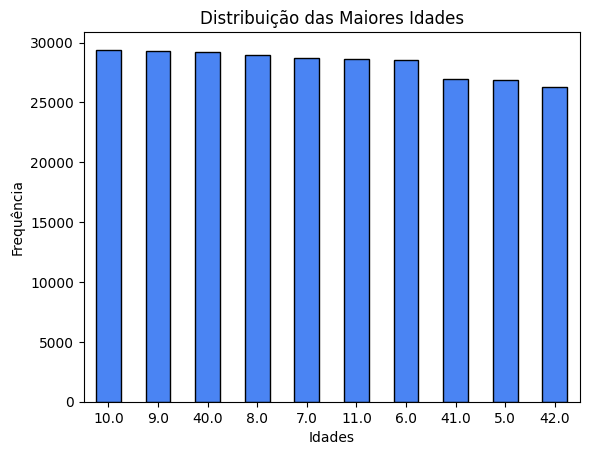

In [187]:
modas = dados['idade'].value_counts().nlargest(10)

modas.plot(kind='bar', color='#4A84F3', edgecolor='black', title='Distribuição das Maiores Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

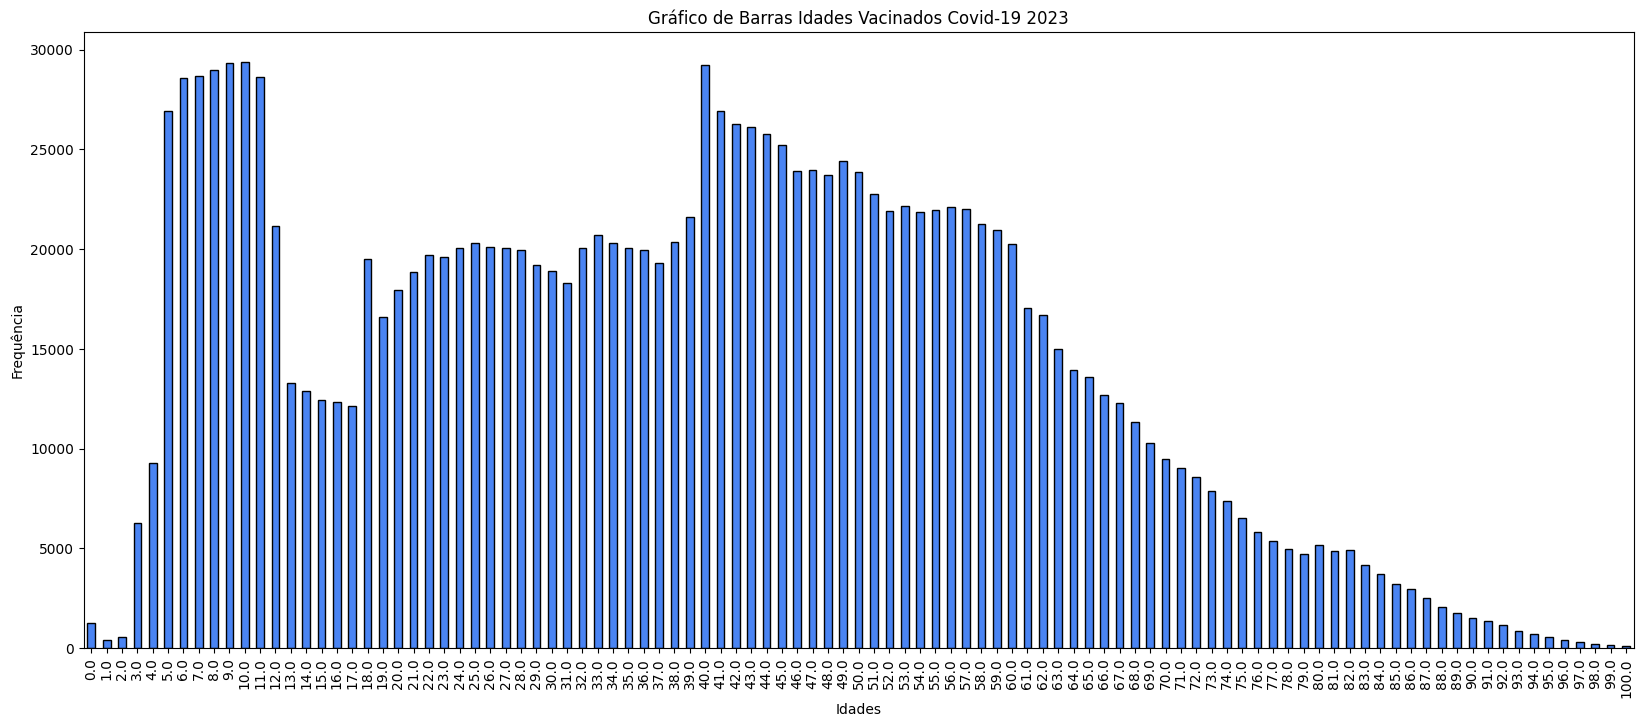

In [188]:
plt.figure(figsize=(20, 8))
frequencias = valores.value_counts().sort_index()
frequencias.plot(kind='bar', color='#4A84F3', edgecolor='black', title='Gráfico de Barras Idades Vacinados Covid-19 2023')
plt.xlabel('Idades')
plt.ylabel('Frequência')

ax = plt.gca() 
ax.xaxis.set_major_locator(MultipleLocator(1))  

plt.xticks(rotation=90)  
plt.show()


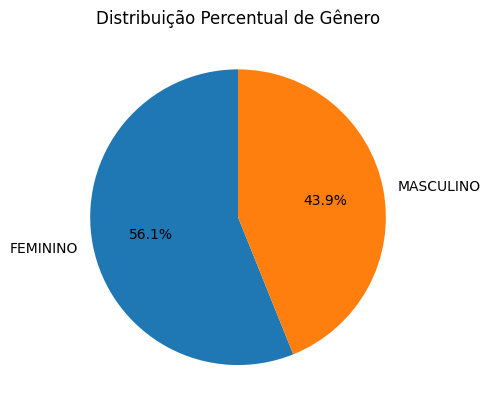

In [189]:
dados_filtrados = dados[dados['sexo'].isin(['MASCULINO', 'FEMININO'])]

contagem_sexo = dados_filtrados['sexo'].value_counts()
contagem_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição Percentual de Gênero')
plt.ylabel('')
plt.show()

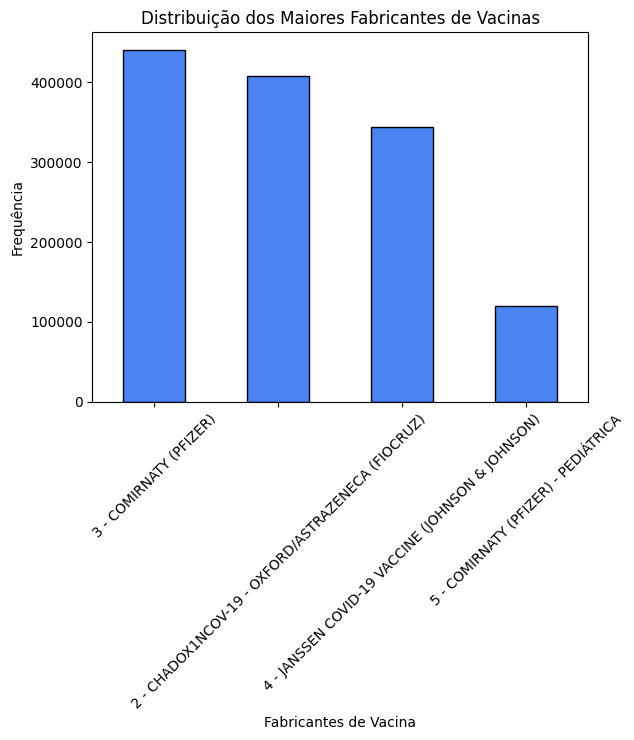

In [190]:
dados['vacina_fabricante'] = dados['vacina_fabricante'].str.extract(r'\((.*?)\)', expand=False)
vacinas = dados['vacina_fabricante'].value_counts().nlargest(4)

vacinas.plot(kind='bar', color='#4A84F3', edgecolor='black', title='Distribuição dos Maiores Fabricantes de Vacinas')
plt.xlabel('Fabricantes de Vacina')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  

plt.show()